In [1]:
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

In [2]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.12.0


# 패션 MNIST 데이터셋 임포트하기

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# 데이터 전처리

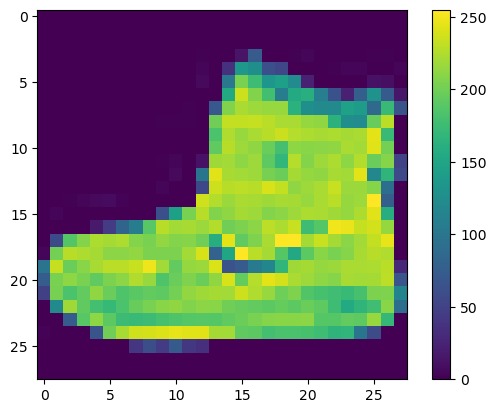

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

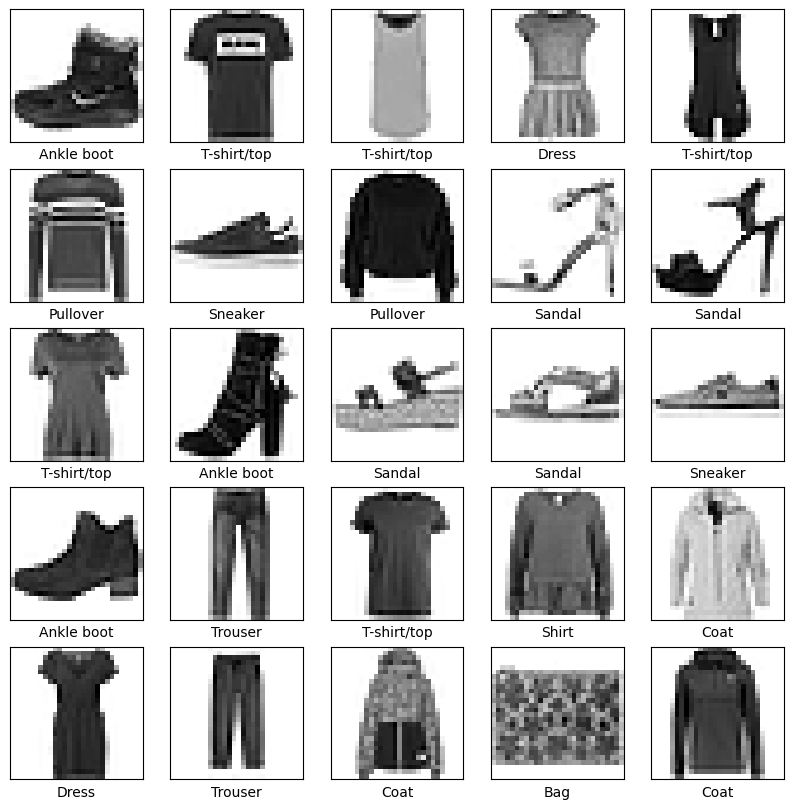

In [11]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

# 모델 구성

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# 모델 훈련

In [14]:
model.fit(x=train_images, y=train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4961 - accuracy: 0.8265
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3707 - accuracy: 0.8664
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3327 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3085 - accuracy: 0.8866
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2925 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2780 - accuracy: 0.8982
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2680 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2566 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2478 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

In [15]:
test_loss, test_accuracy = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.3378 - accuracy: 0.8783 - 500ms/epoch - 2ms/step


In [16]:
print(f'Test Loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

Test Loss: 0.33782628178596497
Test accuracy: 0.8783000111579895


In [17]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [19]:
predictions[0]

array([2.2793506e-10, 6.7074324e-12, 5.1008794e-11, 9.5822995e-11,
       1.6334463e-10, 1.5231961e-04, 1.4571979e-08, 2.7299910e-03,
       5.6384835e-08, 9.9711758e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [22]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)

In [23]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

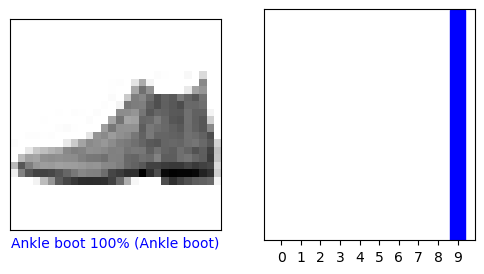

In [24]:
i = 0

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)

plt.show()

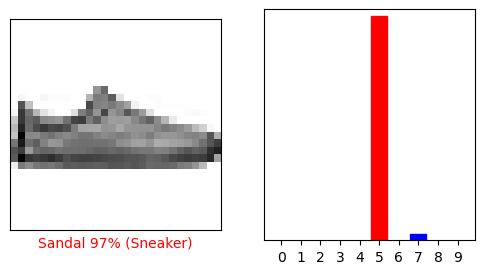

In [25]:
i = 12

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)

plt.show()

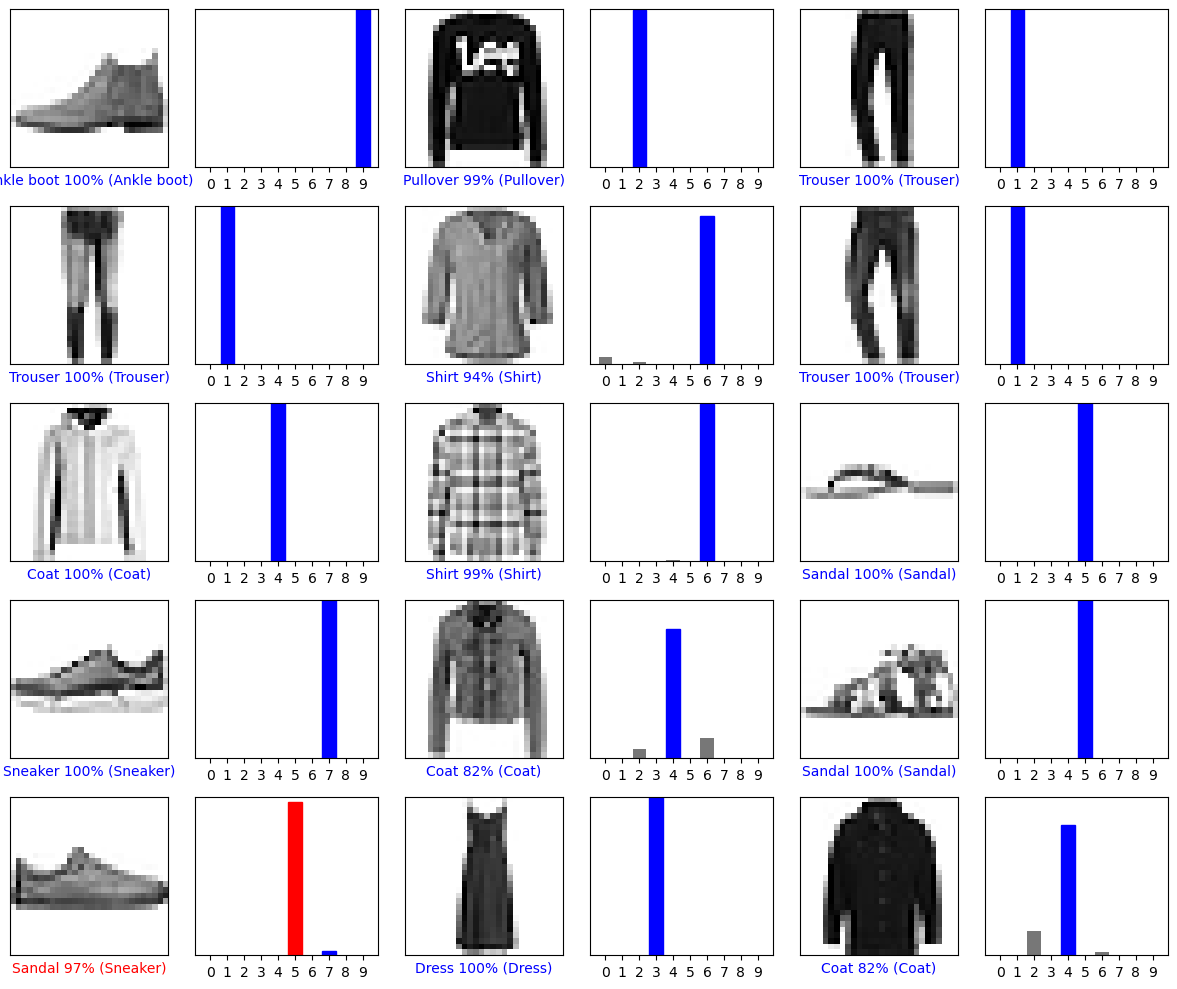

In [26]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

# 훈련된 모델 사용하기

In [27]:
img = test_images[1]
print(img.shape)

(28, 28)


In [28]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = probability_model.predict(img)

1/1 [==============================] - 0s 23ms/step


In [30]:
print(predictions_single)

[[6.3323612e-05 3.3668200e-11 9.9351352e-01 5.4079599e-08 3.2907454e-03
  1.8181797e-15 3.1323752e-03 6.3457187e-19 1.4328266e-09 1.3725172e-12]]


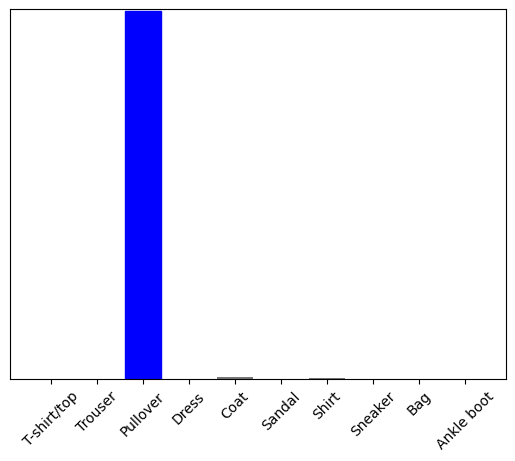

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [32]:
np.argmax(predictions_single[0])

2